In [4]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [5]:
data = read.csv('data/AirlinesCluster.csv.xz')

In [6]:
summary(data)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23800   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

In [7]:
library(caret)

Loading required package: lattice


In [8]:
preproc = preProcess(data)
airlinesNorm = predict(preproc, data)

In [9]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

In [10]:
airDist = dist(airlinesNorm, method='euclidean')

In [11]:
airHier = hclust(airDist, method='ward.D')

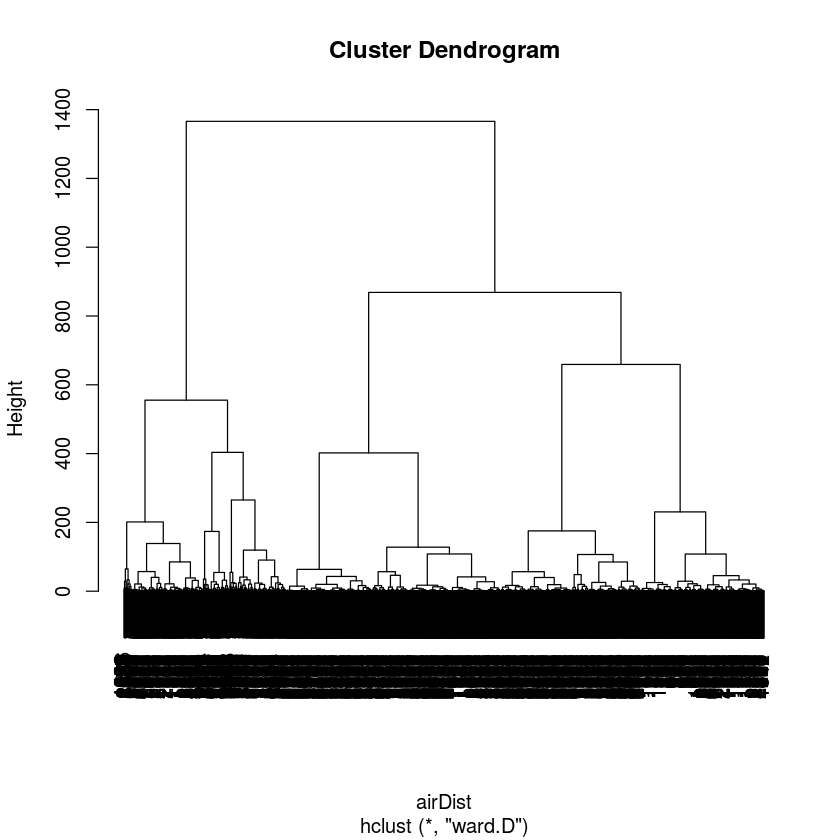

In [12]:
plot(airHier)

In [13]:
k=5
airCut = cutree(airHier, k=k)

In [14]:
table(airCut)

airCut
   1    2    3    4    5 
 776  519  494  868 1342 

In [15]:
#tapply(data, airCut, mean)
spl = split(data, airCut)
#colMeans(spl[[1]])
#sapply(spl, function(x) nrow(x))
sapply(spl, colMeans)
#nrow(spl[[2]])

,1,2,3,4,5
Balance,57866.90,110669.27,198191.57,52335.91,36255.91
QualMiles,0.6443299,1065.9826590,30.3461538,4.8479263,2.5111773
BonusMiles,10360.124,22881.763,55795.860,20788.766,2264.788
BonusTrans,10.823454,18.229287,19.663968,17.087558,2.973174
FlightMiles,83.18428,2613.41811,327.67611,111.57373,119.32191
FlightTrans,0.3028351,7.4026975,1.0688259,0.3444700,0.4388972
DaysSinceEnroll,6235.365,4402.414,5615.709,2840.823,3060.081


In [16]:
set.seed(88)
airKm = kmeans(airlinesNorm, centers=k, iter.max=1000)

In [17]:
table(airKm$cluster)
summary(airKm$cluster)


   1    2    3    4    5 
 408  141  993 1182 1275 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.694   5.000   5.000 

In [21]:
#airKm$centers
spl2 = split(data, airKm$cluster)
sapply(spl2, colMeans)

,1,2,3,4,5
Balance,219161.40,174431.51,67977.44,60166.18,32706.67
QualMiles,539.57843,673.16312,34.99396,55.20812,126.46667
BonusMiles,62474.483,31985.085,24490.019,8709.712,3097.478
BonusTrans,21.524510,28.134752,18.429003,8.362098,4.284706
FlightMiles,623.8725,5859.2340,289.4713,203.2589,181.4698
FlightTrans,1.9215686,17.0000000,0.8851964,0.6294416,0.5403922
DaysSinceEnroll,5605.051,4684.901,3416.783,6109.540,2281.055
